In [44]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np

In [45]:
housing_data = pd.read_csv('five_years_data.csv')

In [46]:
housing_data.head()

,Unnamed: 0,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,...,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
0,5,4/1/2024,4/30/2024,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,...,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,"Houston, TX",26420
1,12,5/1/2024,5/31/2024,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,...,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,"Dallas, TX",19124
2,25,7/1/2024,7/31/2024,Alice,Texas,-1,148000.0,165000.0,103.496504,107.415902,...,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,"Alice, TX",10860
3,47,4/1/2021,4/30/2021,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,...,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,"Alice, TX",10860
4,83,11/1/2022,11/30/2022,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,...,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,"Fort Worth, TX",23104


In [47]:
housing_data = housing_data.drop(columns=["Unnamed: 0", 'property_type_id','parent_metro_region', 'parent_metro_region_metro_code'])
housing_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks
0,4/1/2024,4/30/2024,Holiday Lakes,Texas,56000.0,119900.0,58.577406,178.422619,1,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000
1,5/1/2024,5/31/2024,Krugerville,Texas,712000.0,675000.0,232.662252,246.702890,6,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000
2,7/1/2024,7/31/2024,Alice,Texas,148000.0,165000.0,103.496504,107.415902,11,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333
3,4/1/2021,4/30/2021,Alice,Texas,252000.0,149000.0,106.554703,79.824561,6,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500
4,11/1/2022,11/30/2022,Watauga,Texas,284000.0,299900.0,199.408470,188.335358,18,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727


In [48]:
# SOURCE: https://simplemaps.com/data/us-cities 
cities_population = pd.read_csv("uscities.csv")

# filter North Carolina, Virginia and Texas 
cities_population = cities_population[cities_population['state_name'].isin(['North Carolina', 'Texas', 'Virginia'])]
# Fetch only city, state_name and population columns 
cities_population = cities_population[['city', 'population', 'state_name']]
cities_population.head()

,city,population,state_name
4,Houston,6046392,Texas
5,Dallas,5843632,Texas
25,San Antonio,2069843,Texas
27,Austin,1915031,Texas
39,Charlotte,1436613,North Carolina


In [49]:
# mergind the populaiton datafram into the housind data (addinng us cities cesnus data to the housing data file)
housing_data = pd.merge(housing_data, cities_population, how='left', left_on=['city', 'state'], right_on=['city', 'state_name'])
housing_data = housing_data.drop(columns=['state_name'])

housing_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
0,4/1/2024,4/30/2024,Holiday Lakes,Texas,56000.0,119900.0,58.577406,178.422619,1,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,853.0
1,5/1/2024,5/31/2024,Krugerville,Texas,712000.0,675000.0,232.662252,246.702890,6,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,1929.0
2,7/1/2024,7/31/2024,Alice,Texas,148000.0,165000.0,103.496504,107.415902,11,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,17797.0
3,4/1/2021,4/30/2021,Alice,Texas,252000.0,149000.0,106.554703,79.824561,6,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,17797.0
4,11/1/2022,11/30/2022,Watauga,Texas,284000.0,299900.0,199.408470,188.335358,18,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,23336.0


In [50]:
# filter Texas data based on cities population size in descending order to know the largest city based on population size 
texas_data = housing_data[housing_data['state']=='Texas']
texas_data = texas_data.sort_values(by='population', ascending=False)
texas_data.to_csv("texas_data.csv", index=False)
texas_data.head(1)

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
181246,7/1/2024,7/31/2024,Houston,Texas,159000.0,340000.0,150.397083,181.523283,170,185.0,270.0,1074.0,6.3,57.0,0.954549,0.052941,0.124324,6046392.0


In [51]:
# Filter Houston TX data (largest population)
huston_TX = texas_data[texas_data['city']=='Houston']
huston_TX.to_csv("huston_TX_data.csv", index=False)
huston_TX.head(1)

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
181246,7/1/2024,7/31/2024,Houston,Texas,159000.0,340000.0,150.397083,181.523283,170,185.0,270.0,1074.0,6.3,57.0,0.954549,0.052941,0.124324,6046392.0


In [52]:
print(f"number of rows for Huston data is: {len(huston_TX)}")

number of rows for Huston data is: 300


In [53]:
# Filter the North Carlolina cities population in descending order
NC_data = housing_data[housing_data['state']=='North Carolina']
NC_data = NC_data.sort_values(by='population', ascending=False)
NC_data.to_csv("NC_data.csv", index=False)
NC_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
218957,12/1/2024,12/31/2024,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
237945,2/1/2023,2/28/2023,Charlotte,North Carolina,560000.0,399900.0,286.298568,225.218023,3,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
76811,7/1/2024,7/31/2024,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
209000,3/1/2021,3/31/2021,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
47730,3/1/2024,3/31/2024,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [54]:
# Filter out the largest city in North Carolina 
charlotte_data = NC_data[NC_data['city']=='Charlotte']
charlotte_data.to_csv("Charlotte_data.csv", index=False)
charlotte_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
218957,12/1/2024,12/31/2024,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
237945,2/1/2023,2/28/2023,Charlotte,North Carolina,560000.0,399900.0,286.298568,225.218023,3,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
76811,7/1/2024,7/31/2024,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
209000,3/1/2021,3/31/2021,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
47730,3/1/2024,3/31/2024,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [55]:
print(f'The number of rows in charlotte data is: {(len(charlotte_data))}')

The number of rows in charlotte data is: 299


In [56]:
# Filtering Virginia data based on cities population in decsending order 
virginia_data = housing_data[housing_data['state']=='Virginia'] 
virginia_data = virginia_data.sort_values(by='population', ascending=False)
virginia_data.to_csv("virginia_data.csv", index=False)
virginia_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
69892,2/1/2023,2/28/2023,Virginia Beach,Virginia,316500.0,349000.0,174.167269,210.382413,2,NaN,1.0,1.0,0.5,18.0,0.996368,0.500000,NaN,1431821.0
92740,4/1/2022,4/30/2022,Virginia Beach,Virginia,420000.0,345000.0,218.750000,201.950523,383,466.0,522.0,374.0,1.0,12.0,1.035801,0.697128,0.832618,1431821.0
165447,3/1/2020,3/31/2020,Virginia Beach,Virginia,185000.0,299000.0,137.199198,165.923331,124,158.0,132.0,185.0,1.5,25.0,0.991678,0.306452,0.613924,1431821.0
107552,3/1/2020,3/31/2020,Virginia Beach,Virginia,318950.0,299000.0,164.904892,165.923331,416,526.0,554.0,836.0,2.0,28.0,0.993213,0.250000,0.631179,1431821.0
118684,8/1/2021,8/31/2021,Virginia Beach,Virginia,325000.0,319000.0,184.601665,184.226044,941,1026.0,925.0,993.0,1.1,20.0,1.014474,0.573858,0.718324,1431821.0


In [57]:
virginia_beach_data = virginia_data[virginia_data['city']=='Virginia Beach']
virginia_beach_data.to_csv("virginia_beach_data.csv", index=False)
virginia_beach_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
69892,2/1/2023,2/28/2023,Virginia Beach,Virginia,316500.0,349000.0,174.167269,210.382413,2,NaN,1.0,1.0,0.5,18.0,0.996368,0.500000,NaN,1431821.0
92740,4/1/2022,4/30/2022,Virginia Beach,Virginia,420000.0,345000.0,218.750000,201.950523,383,466.0,522.0,374.0,1.0,12.0,1.035801,0.697128,0.832618,1431821.0
165447,3/1/2020,3/31/2020,Virginia Beach,Virginia,185000.0,299000.0,137.199198,165.923331,124,158.0,132.0,185.0,1.5,25.0,0.991678,0.306452,0.613924,1431821.0
107552,3/1/2020,3/31/2020,Virginia Beach,Virginia,318950.0,299000.0,164.904892,165.923331,416,526.0,554.0,836.0,2.0,28.0,0.993213,0.250000,0.631179,1431821.0
118684,8/1/2021,8/31/2021,Virginia Beach,Virginia,325000.0,319000.0,184.601665,184.226044,941,1026.0,925.0,993.0,1.1,20.0,1.014474,0.573858,0.718324,1431821.0


In [58]:
print(f'Number of rows in Virginia Beach data are: {(len(virginia_beach_data))}')

Number of rows in Virginia Beach data are: 291


### Analyzing Charlotte's overtime house market trend


In [59]:
# drop city and state columns
charlotte_data = charlotte_data.drop(columns=['city', 'state'])

In [60]:
charlotte_data.isna().mean() * 100


period_begin                 0.0
period_end                   0.0
median_sale_price            0.0
median_list_price            0.0
median_ppsf                  0.0
median_list_ppsf             0.0
homes_sold                   0.0
pending_sales              100.0
new_listings                 0.0
inventory                    0.0
months_of_supply             0.0
median_dom                   0.0
avg_sale_to_list             0.0
sold_above_list              0.0
off_market_in_two_weeks      0.0
population                   0.0
dtype: float64

In [61]:
# drop columns that has 100 missing values 
charlotte_data = charlotte_data.drop(columns=['pending_sales'])


In [62]:
# Optimizind the data types for each columns 
charlotte_data.dtypes

period_begin                object
period_end                  object
median_sale_price          float64
median_list_price          float64
median_ppsf                float64
median_list_ppsf           float64
homes_sold                   int64
new_listings               float64
inventory                  float64
months_of_supply           float64
median_dom                 float64
avg_sale_to_list           float64
sold_above_list            float64
off_market_in_two_weeks    float64
population                 float64
dtype: object

In [63]:
# converting date columns 
charlotte_data['period_begin']=pd.to_datetime(charlotte_data['period_begin'])
charlotte_data['period_end']=pd.to_datetime(charlotte_data['period_end'])

In [64]:
# converting numeric columns to optimize memory usage 
float_cols = ['median_sale_price', 'median_list_price', 'median_ppsf', 
              'median_list_ppsf', 'months_of_supply', 'avg_sale_to_list', 
              'sold_above_list', 'off_market_in_two_weeks']
charlotte_data[float_cols] = charlotte_data[float_cols].astype('float32')
                                            

In [65]:
int_cols = ['homes_sold', 'new_listings', 'inventory', 
            'median_dom', 'population']
charlotte_data[int_cols]=charlotte_data[int_cols].astype('int32')

In [66]:
charlotte_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   period_begin             299 non-null    datetime64[ns]
 1   period_end               299 non-null    datetime64[ns]
 2   median_sale_price        299 non-null    float32       
 3   median_list_price        299 non-null    float32       
 4   median_ppsf              299 non-null    float32       
 5   median_list_ppsf         299 non-null    float32       
 6   homes_sold               299 non-null    int32         
 7   new_listings             299 non-null    int32         
 8   inventory                299 non-null    int32         
 9   months_of_supply         299 non-null    float32       
 10  median_dom               299 non-null    int32         
 11  avg_sale_to_list         299 non-null    float32       
 12  sold_above_list          299 non-

#### price trend overtime

In [67]:
# working from the copy of the dataframe
charlotte_data_copy = charlotte_data.copy()

In [68]:
charlotte_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   period_begin             299 non-null    datetime64[ns]
 1   period_end               299 non-null    datetime64[ns]
 2   median_sale_price        299 non-null    float32       
 3   median_list_price        299 non-null    float32       
 4   median_ppsf              299 non-null    float32       
 5   median_list_ppsf         299 non-null    float32       
 6   homes_sold               299 non-null    int32         
 7   new_listings             299 non-null    int32         
 8   inventory                299 non-null    int32         
 9   months_of_supply         299 non-null    float32       
 10  median_dom               299 non-null    int32         
 11  avg_sale_to_list         299 non-null    float32       
 12  sold_above_list          299 non-

In [69]:
# extract the year from the period_begin tabe 
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_avg = charlotte_data_copy.groupby('year').agg(
    median_sale_price=('median_sale_price', 'mean'),
    median_ppsf=('median_ppsf', 'median'), inventory=('inventory', 'mean')
).reset_index()
yearly_avg.head()

,year,median_sale_price,median_ppsf,inventory
0,2020,272626.53125,156.256012,1228.728814
1,2021,326185.15625,191.241013,901.766667
2,2022,380727.96875,223.813797,777.200000
3,2023,393108.40625,231.474213,755.266667
4,2024,426767.09375,242.654297,981.833333


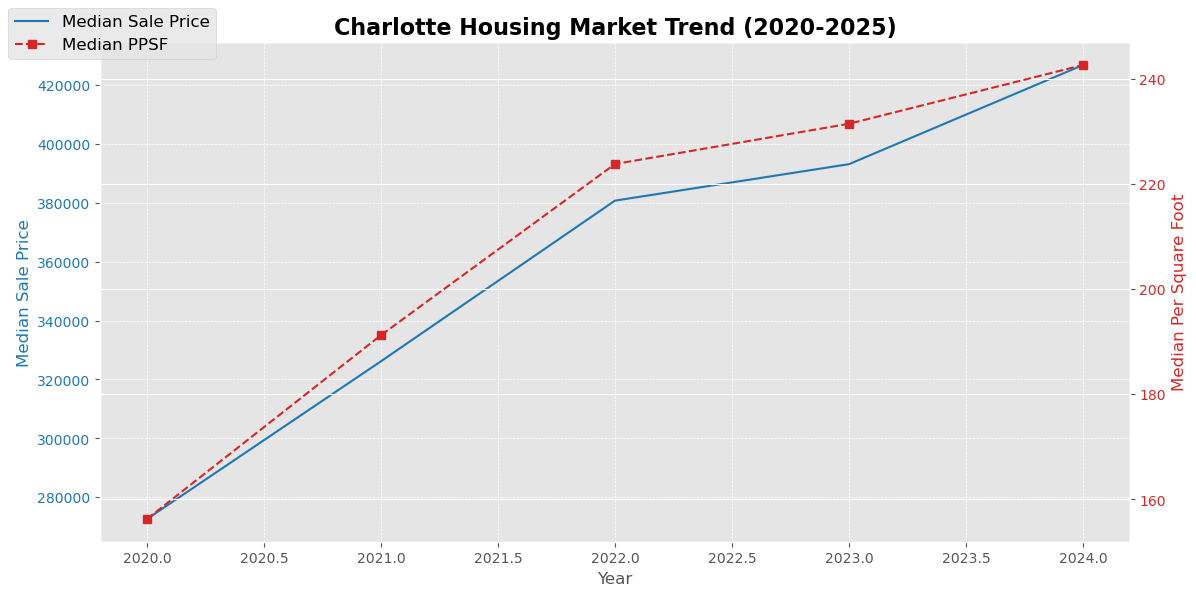

In [70]:
fig, ax1 = plt.subplots(figsize=(12,6))
# Plot median sale price on the first y-axis
ax1.set_title('Charlotte Housing Market Trend (2020-2025)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Median Sale Price', color='tab:blue', fontsize=12)
ax1.plot(yearly_avg['year'], yearly_avg['median_sale_price'], label='Median Sale Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the median PPSF
ax2 = ax1.twinx()
ax2.set_ylabel('Median Per Square Foot', color='tab:red', fontsize=12)
ax2.plot(yearly_avg['year'], yearly_avg['median_ppsf'], label='Median PPSF', color='tab:red', marker='s', linestyle='--', markersize=6)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=10)
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

fig.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('charlotte_housing_Market_2020_25.png')
plt.show()

$Analysis:$
- Charlotte Housing Market Surge (2020-2025): Median Sale Price Soars from Below 280K to Over 420K

In [71]:
# Grouping listing price, sale price and inventory coulmns by year
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_average = charlotte_data_copy.groupby('year').agg(
    listing_price=('median_list_price', 'mean'),
    sale_price=('median_sale_price', 'mean'), 
    inventory =('inventory', 'mean')
).reset_index()
yearly_average.head()

,year,listing_price,sale_price,inventory
0,2020,291759.18750,272626.53125,1228.728814
1,2021,339648.03125,326185.15625,901.766667
2,2022,384997.50000,380727.96875,777.200000
3,2023,403750.00000,393108.40625,755.266667
4,2024,417080.62500,426767.09375,981.833333


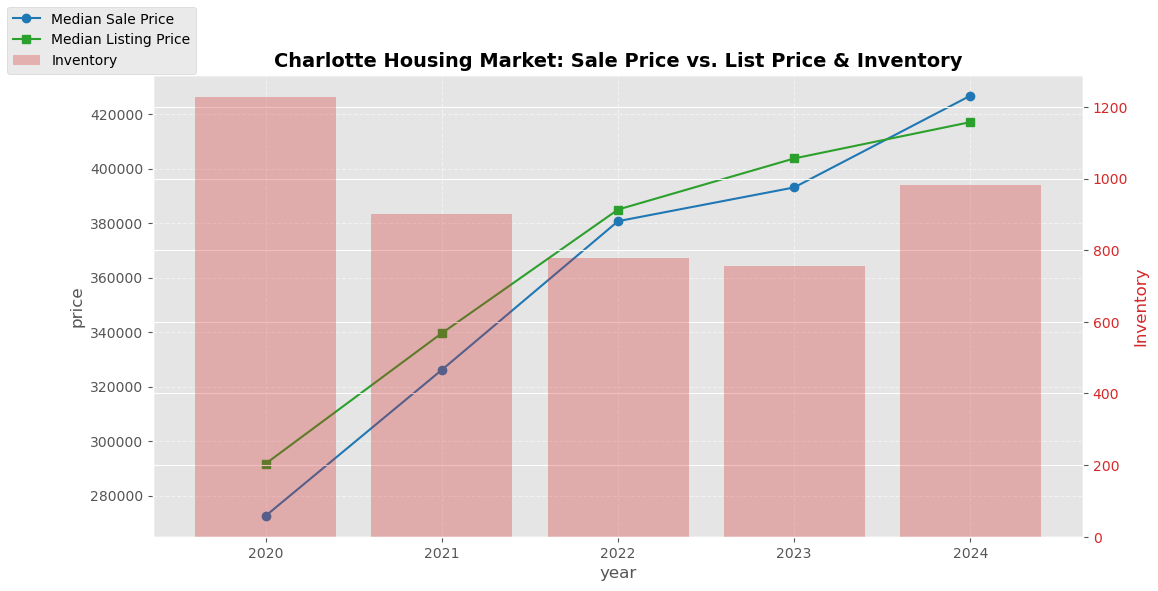

In [72]:
# Drawing line charge to compare the listing and sale pricea as well as the inventory over the last five year 

fig, ax1 = plt.subplots(figsize=(12,6))
# plotting list and sale price 
ax1.set_xlabel('year', fontsize=12)
ax1.set_ylabel('price', fontsize=12)
ax1.plot(yearly_average['year'], yearly_average['sale_price'], 
         label='Median Sale Price', color='tab:blue', marker="o")
ax1.plot(yearly_average['year'], yearly_average['listing_price'], 
         label='Median Listing Price', color='tab:green', marker='s')

# plot the second y axis 
ax2 = ax1.twinx()
ax2.set_ylabel('Inventory', color='tab:red', fontsize=12)
ax2.bar(yearly_average['year'], yearly_average['inventory'], 
        color='tab:red', alpha=0.3, label='Inventory')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Charlotte Housing Market: Sale Price vs. List Price & Inventory", fontsize=14, fontweight='bold')
fig.legend(loc='upper left', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [73]:
# Convert 'period_begin' to datetime for each city
charlotte_data['period_begin'] = pd.to_datetime(charlotte_data['period_begin'], errors='coerce')
huston_TX['period_begin'] = pd.to_datetime(huston_TX['period_begin'], errors='coerce')
virginia_beach_data['period_begin'] = pd.to_datetime(virginia_beach_data['period_begin'], errors='coerce')

# Drop rows with invalid dates
charlotte_data = charlotte_data[charlotte_data['period_begin'].notna()]
huston_TX = huston_TX[huston_TX['period_begin'].notna()]
virginia_beach_data = virginia_beach_data[virginia_beach_data['period_begin'].notna()]

# Extract the year from 'period_begin' for each city
charlotte_data['year'] = charlotte_data['period_begin'].dt.year
huston_TX['year'] = huston_TX['period_begin'].dt.year
virginia_beach_data['year'] = virginia_beach_data['period_begin'].dt.year

# Aggregate the data by year and rename columns for each city
charlotte_agg = charlotte_data.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'sum'
}).reset_index().rename(columns={
    'median_sale_price': 'charlotte_sale_price',
    'median_ppsf': 'charlotte_ppsf',
    'inventory': 'charlotte_inventory'
})

houston_agg = huston_TX.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'sum'
}).reset_index().rename(columns={
    'median_sale_price': 'houston_sale_price',
    'median_ppsf': 'houston_ppsf',
    'inventory': 'houston_inventory'
})

virginia_beach_agg = virginia_beach_data.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'sum'
}).reset_index().rename(columns={
    'median_sale_price': 'virginia_beach_sale_price',
    'median_ppsf': 'virginia_beach_ppsf',
    'inventory': 'virginia_beach_inventory'
})

# Merge the aggregated data for all cities
merged_city_data = charlotte_agg.merge(houston_agg, on='year', how='outer')
merged_city_data = merged_city_data.merge(virginia_beach_agg, on='year', how='outer')

# Display the first few rows of the merged data
merged_city_data.head()


C:\Users\Jcroc\AppData\Local\Temp\ipykernel_1368\2943267292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huston_TX['period_begin'] = pd.to_datetime(huston_TX['period_begin'], errors='coerce')
C:\Users\Jcroc\AppData\Local\Temp\ipykernel_1368\2943267292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_beach_data['period_begin'] = pd.to_datetime(virginia_beach_data['period_begin'], errors='coerce')


,year,charlotte_sale_price,charlotte_ppsf,charlotte_inventory,houston_sale_price,houston_ppsf,houston_inventory,virginia_beach_sale_price,virginia_beach_ppsf,virginia_beach_inventory
0,2020,272626.53125,166.797623,72495,252925.025000,135.559494,180306.0,287821.059322,169.623699,27830.0
1,2021,326185.15625,199.530548,54106,286295.816667,153.239496,139568.0,341752.500000,187.008320,19626.0
2,2022,380727.96875,231.725647,46632,308355.075000,167.274235,125456.0,351352.864407,208.476483,15876.0
3,2023,393108.40625,238.749329,45316,309670.083333,171.956629,135732.0,412520.118182,225.667012,14588.0
4,2024,426767.09375,257.400299,58910,328160.000000,176.847848,169810.0,407627.293103,237.328852,16762.0


In [74]:
merged_city_data.to_csv("listing_sale_inve_4_CLT_HU_VA.csv")

In [75]:
plt.style.use('ggplot')  # Set the style for cleaner plots

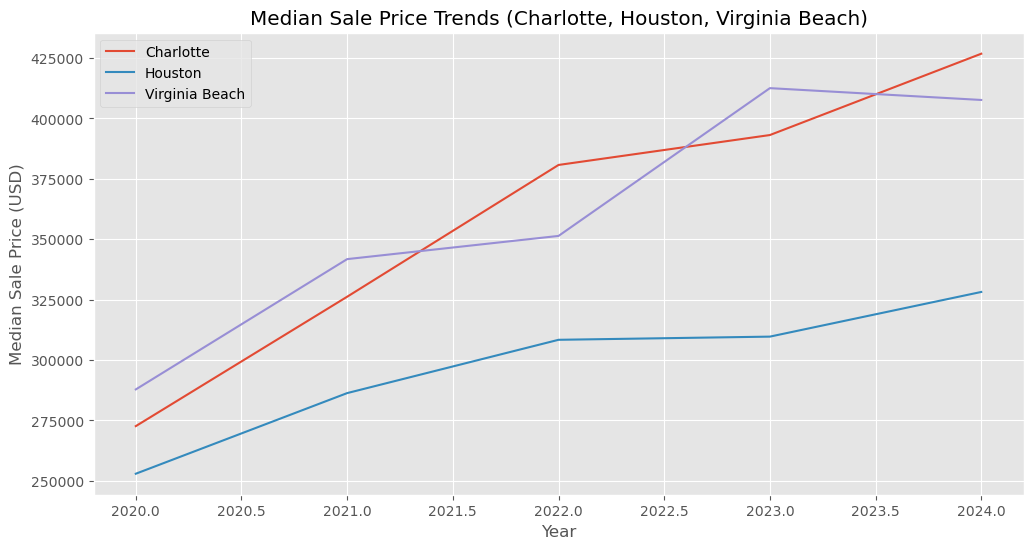

In [76]:
# 1. Median Sale Price Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_sale_price'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_sale_price'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_sale_price'], label='Virginia Beach')
plt.title('Median Sale Price Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Median Sale Price (USD)')
plt.legend()
plt.show()

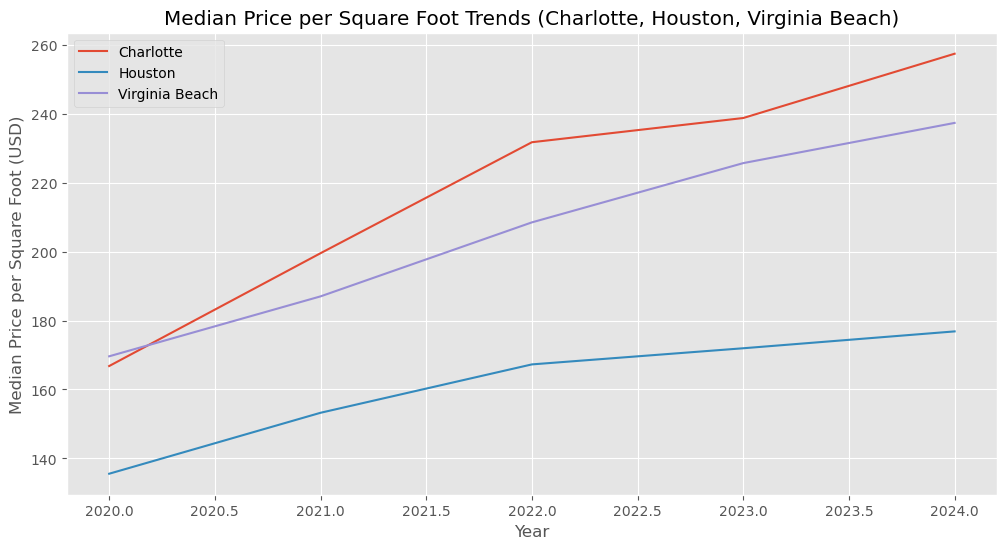

In [77]:
# 2. Median Price per Square Foot Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_ppsf'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_ppsf'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_ppsf'], label='Virginia Beach')
plt.title('Median Price per Square Foot Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Median Price per Square Foot (USD)')
plt.legend()
plt.show()

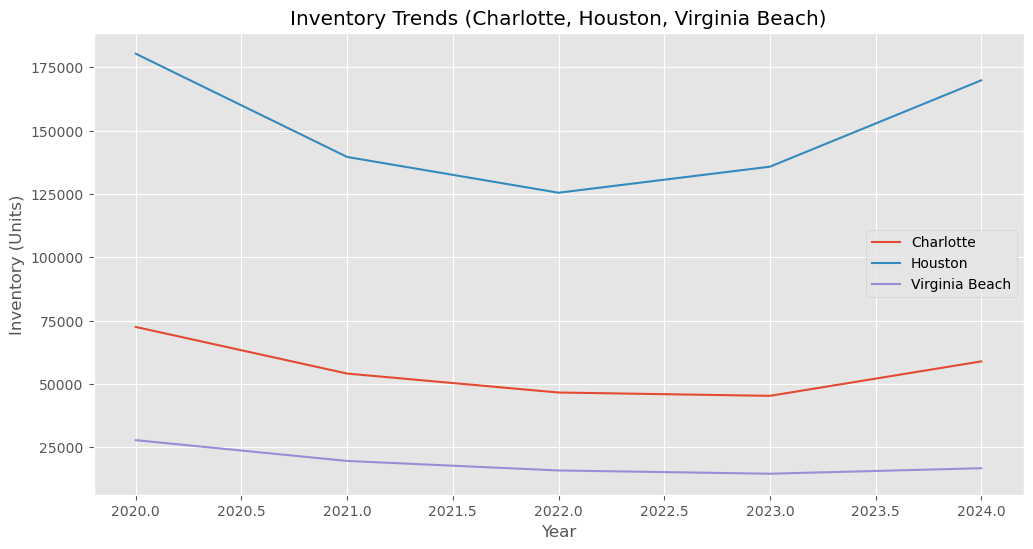

In [78]:
# 3. Inventory Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_inventory'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_inventory'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_inventory'], label='Virginia Beach')
plt.title('Inventory Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Inventory (Units)')
plt.legend()
plt.show()

C:\Users\Jcroc\AppData\Local\Temp\ipykernel_1368\222466950.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(


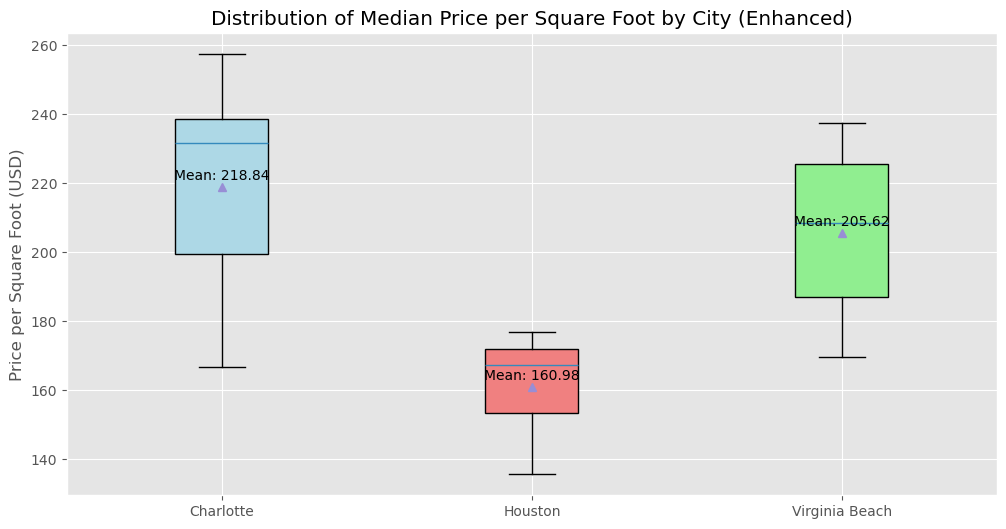

In [85]:
# Set Fig Size
plt.figure(figsize=(12, 6))

# Box Plot for Median Price per Square Foot by City with Enhanced Details
boxplot = plt.boxplot(
    [merged_city_data['charlotte_ppsf'].dropna(), merged_city_data['houston_ppsf'].dropna(), merged_city_data['virginia_beach_ppsf'].dropna()],
    labels=['Charlotte', 'Houston', 'Virginia Beach'],
    patch_artist=True,  # Enable custom colors
    showmeans=True  # Show the mean as a point
)

# Customizing colors
colors = ['lightblue', 'lightcoral', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Titles and labels
plt.title('Distribution of Median Price per Square Foot by City (Enhanced)')
plt.ylabel('Price per Square Foot (USD)')

# Adding annotations for mean values
mean_values = [
    merged_city_data['charlotte_ppsf'].mean(),
    merged_city_data['houston_ppsf'].mean(),
    merged_city_data['virginia_beach_ppsf'].mean()
]

for i, mean in enumerate(mean_values, start=1):
    plt.text(i, mean + 2, f'Mean: {mean:.2f}', fontsize=10, color='black', ha='center')

plt.show()

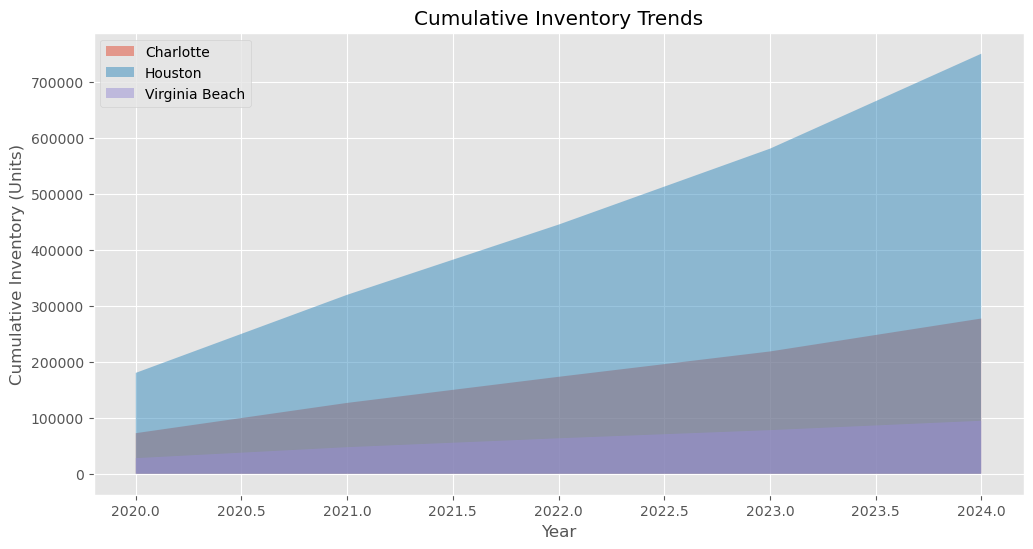

In [80]:
#cumulative area chart to show relative inventory growth/decline
plt.figure(figsize=(12, 6))
plt.fill_between(merged_city_data['year'], merged_city_data['charlotte_inventory'].cumsum(), alpha=0.5, label='Charlotte')
plt.fill_between(merged_city_data['year'], merged_city_data['houston_inventory'].cumsum(), alpha=0.5, label='Houston')
plt.fill_between(merged_city_data['year'], merged_city_data['virginia_beach_inventory'].cumsum(), alpha=0.5, label='Virginia Beach')
plt.title('Cumulative Inventory Trends')
plt.xlabel('Year')
plt.ylabel('Cumulative Inventory (Units)')
plt.legend()
plt.show()

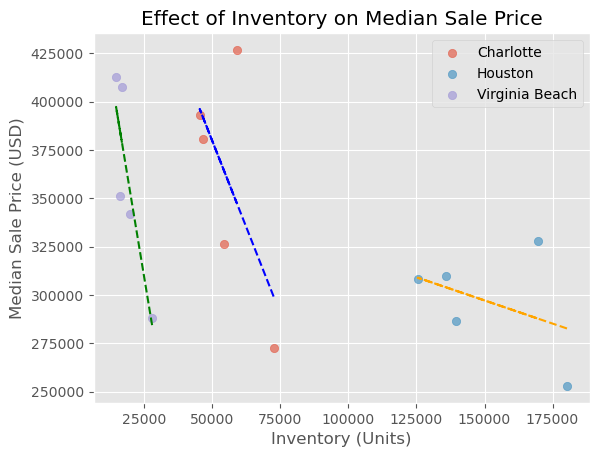

In [81]:
# Scatter plot for inventory vs. median sale price for each city
plt.scatter(merged_city_data['charlotte_inventory'], merged_city_data['charlotte_sale_price'], alpha=0.6, label='Charlotte')
plt.scatter(merged_city_data['houston_inventory'], merged_city_data['houston_sale_price'], alpha=0.6, label='Houston')
plt.scatter(merged_city_data['virginia_beach_inventory'], merged_city_data['virginia_beach_sale_price'], alpha=0.6, label='Virginia Beach')

# Add titles and labels
plt.title('Effect of Inventory on Median Sale Price')
plt.xlabel('Inventory (Units)')
plt.ylabel('Median Sale Price (USD)')
plt.legend()

# Optional: Add a trendline for each city
def add_trendline(x, y, color):
    z = np.polyfit(x, y, 1)  # Fit a linear trendline (degree=1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color)

add_trendline(merged_city_data['charlotte_inventory'], merged_city_data['charlotte_sale_price'], 'blue')
add_trendline(merged_city_data['houston_inventory'], merged_city_data['houston_sale_price'], 'orange')
add_trendline(merged_city_data['virginia_beach_inventory'], merged_city_data['virginia_beach_sale_price'], 'green')

plt.show()